# Neural Anisotropy Directions

**Authors**: Guillermo Ortiz-Jimenez, Apostolos Modas, Seyed-Mohsen Moosavi-Dezfooli and Pascal Frossard

## Table of contents

- [General training setup](#training_setup)
- [Linearly separable dataset](#gen_linear_data)
- [NAD Computation](#vis_NADs)
- [Poisoning CIFAR-10 dataset](#poison)

In [2]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms

from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from torch.utils.data import DataLoader
from models import TransformLayer
from models import LogReg, LeNet, VGG11_bn, ResNet18, DenseNet121
from vit import ViT

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

We expect that you have stored all NADs in the path `./NADs/`. The next lines of code let you visualize them.

In [3]:
NAD_dir = './NADs/'
architecture = 'ViT' # 'LogReg', 'LeNet', 'VGG11', 'ResNet18', 'DenseNet121'

# Indices to visualize
indices = list(range(5))

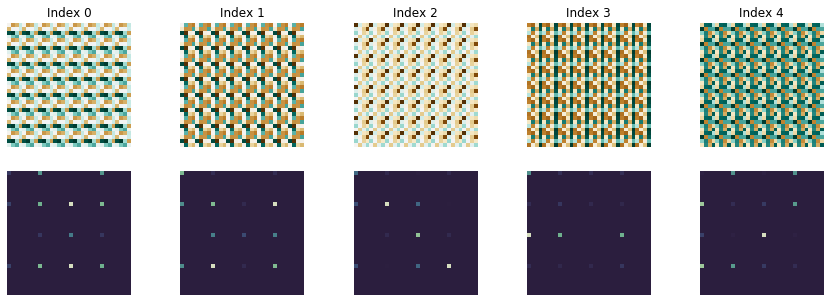

In [4]:
NAD_path = NAD_dir + architecture + '_NADs.npy'

NADs = np.load(NAD_path).reshape([-1, 32, 32])

plt.figure(figsize=(15,5))

for n, index in enumerate(indices):
    x = NADs[index]
    
    vmax = np.max([np.abs(x.max()), np.abs(x.min())])
    vmin = -vmax

    cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True, reverse=True)

    x_fft = np.fft.fftshift(np.fft.fft2(x))
    
    plt.subplot(2*np.ceil(len(indices) / 5),5,n+5*(n// 5)+1)
    plt.imshow(x, cmap='BrBG', vmin=vmin, vmax=vmax)
    plt.title(r'Index %d'%index)
    plt.axis('off')

    plt.subplot(2*np.ceil(len(indices) / 5),5,n+5*(n// 5 + 1)+1)
    plt.imshow(np.abs(x_fft)**2, cmap=cmap)
    plt.axis('off')

In [5]:
eigenvals_lenet_path = NAD_dir + 'LeNet' + '_eigenvals.npy'
eigenvals_lenet = np.load(eigenvals_lenet_path)
# eigenvals_lenet = eigenvals_lenet / np.sum(eigenvals_lenet)

eigenvals_resnet18_path = NAD_dir + 'ResNet18' + '_eigenvals.npy'
eigenvals_resnet18 = np.load(eigenvals_resnet18_path)

eigenvals_vit_path = NAD_dir + 'ViT' + '_eigenvals.npy'
eigenvals_vit = np.load(eigenvals_vit_path)

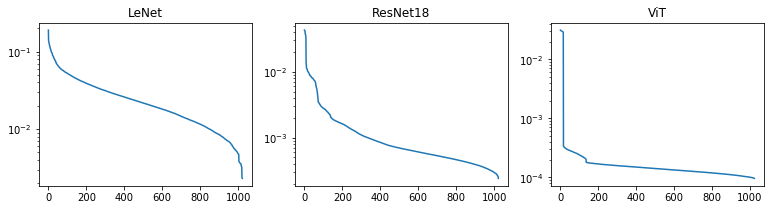

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))

axs[0].plot(eigenvals_lenet)
axs[0].set_yscale('log')
axs[0].set_title('LeNet')

axs[1].plot(eigenvals_resnet18)
axs[1].set_yscale('log')
axs[1].set_title('ResNet18')

axs[2].plot(eigenvals_vit)
axs[2].set_yscale('log')
axs[2].set_title('ViT')

plt.show()